In [137]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [150]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(100, 2) - [2, 2], np.random.randn(100, 2) + [2, 2]]
Y = [0] * 50 + [1] * 50 + [0] * 50 + [1] * 50

# figure number
fignum = 1

penalty:  1
train_accuracy :  0.6125
[[26 14]
 [17 23]]
test_accuracy :  0.4166666666666667
[[23 37]
 [33 27]]


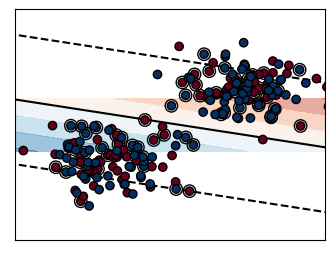

penalty:  0.005
train_accuracy :  0.625
[[27 13]
 [17 23]]
test_accuracy :  0.43333333333333335
[[25 35]
 [33 27]]


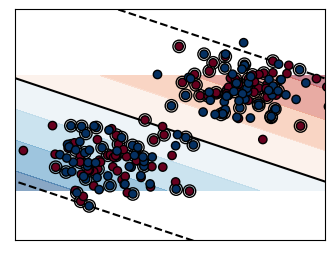

penalty:  0.5
train_accuracy :  0.6125
[[26 14]
 [17 23]]
test_accuracy :  0.425
[[24 36]
 [33 27]]


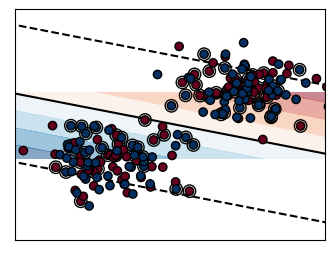

penalty:  5
train_accuracy :  0.625
[[27 13]
 [17 23]]
test_accuracy :  0.4166666666666667
[[23 37]
 [33 27]]


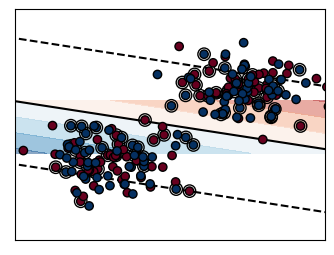

penalty:  10
train_accuracy :  0.625
[[27 13]
 [17 23]]
test_accuracy :  0.4166666666666667
[[23 37]
 [33 27]]


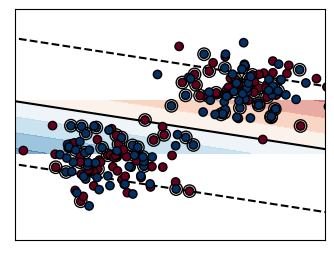

penalty:  10000
train_accuracy :  0.625
[[27 13]
 [17 23]]
test_accuracy :  0.4166666666666667
[[23 37]
 [33 27]]


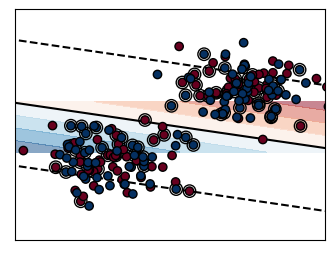

In [139]:


# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.005), ("reg", 0.5), ("reg", 5), ("reg", 10), ("reg", 10000)):
    print("penalty: ",penalty)

    
    train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.6, random_state=9)
    
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(train_X, train_Y)
    
    train_pred = clf.predict(train_X)
    train_cm = confusion_matrix(train_Y, train_pred)
    train_accuracy = accuracy_score(train_Y, train_pred)
    print("train_accuracy : ", train_accuracy)
    print(train_cm)
    
    test_pred = clf.predict(test_X)
    test_cm = confusion_matrix(test_Y, test_pred)  
    test_accuracy = accuracy_score(test_Y, test_pred)  
    print("test_accuracy : ", test_accuracy)
    print(test_cm)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
    plt.show()



Sigmoid
penalty:  1
train_accuracy :  0.525
[[28 12]
 [26 14]]
test_accuracy :  0.48333333333333334
[[30 30]
 [32 28]]


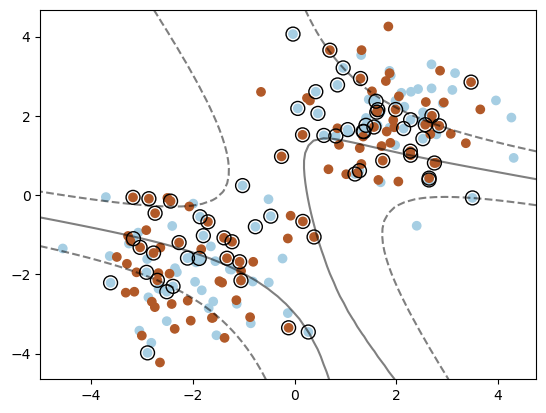

Sigmoid
penalty:  0.005
train_accuracy :  0.6125
[[26 14]
 [17 23]]
test_accuracy :  0.425
[[24 36]
 [33 27]]


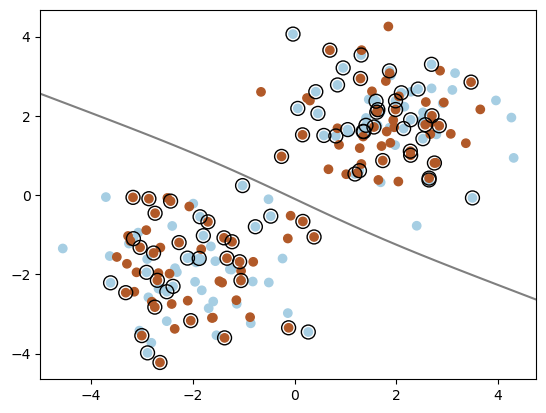

Sigmoid
penalty:  0.5
train_accuracy :  0.5875
[[29 11]
 [22 18]]
test_accuracy :  0.425
[[25 35]
 [34 26]]


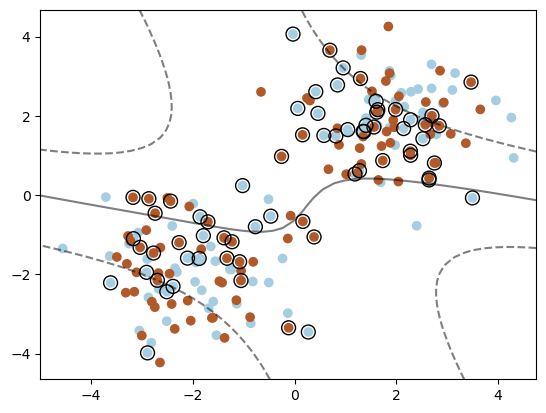

Sigmoid
penalty:  5
train_accuracy :  0.5
[[18 22]
 [18 22]]
test_accuracy :  0.5416666666666666
[[27 33]
 [22 38]]


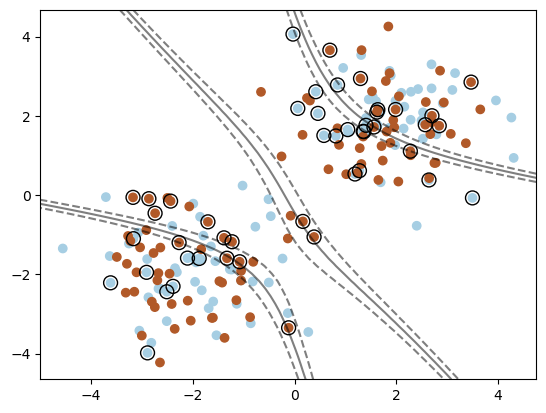

Sigmoid
penalty:  10
train_accuracy :  0.4625
[[18 22]
 [21 19]]
test_accuracy :  0.5416666666666666
[[28 32]
 [23 37]]


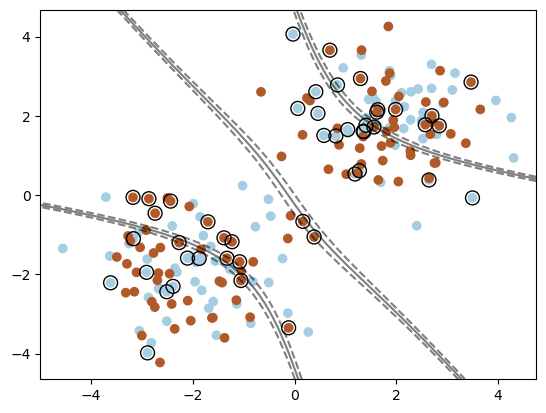

Sigmoid
penalty:  10000
train_accuracy :  0.4625
[[18 22]
 [21 19]]
test_accuracy :  0.55
[[31 29]
 [25 35]]


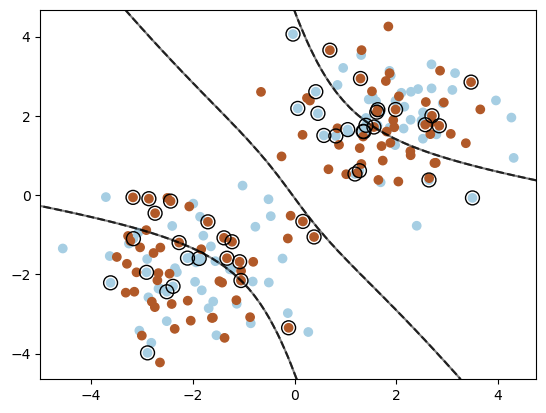

In [153]:


# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.005), ("reg", 0.5), ("reg", 5), ("reg", 10), ("reg", 10000)):
    
    print("Sigmoid")
    print("penalty: ",penalty)
    
    train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.6, random_state=9)
    
    clf = svm.SVC(kernel="sigmoid", C=penalty)
    clf.fit(train_X, train_Y)
    
    train_pred = clf.predict(train_X)
    train_cm = confusion_matrix(train_Y, train_pred)
    train_accuracy = accuracy_score(train_Y, train_pred)
    print("train_accuracy : ", train_accuracy)
    print(train_cm)
    
    test_pred = clf.predict(test_X)
    test_cm = confusion_matrix(test_Y, test_pred)  
    test_accuracy = accuracy_score(test_Y, test_pred)  
    print("test_accuracy : ", test_accuracy)
    print(test_cm)
    
    # Plot the decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    plt.show()

    

Poly
penalty:  1
train_accuracy :  0.625
[[26 14]
 [16 24]]
test_accuracy :  0.4583333333333333
[[26 34]
 [31 29]]


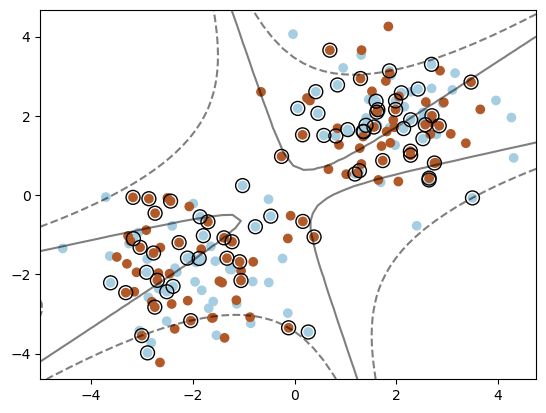

Poly
penalty:  0.005
train_accuracy :  0.525
[[34  6]
 [32  8]]
test_accuracy :  0.48333333333333334
[[46 14]
 [48 12]]


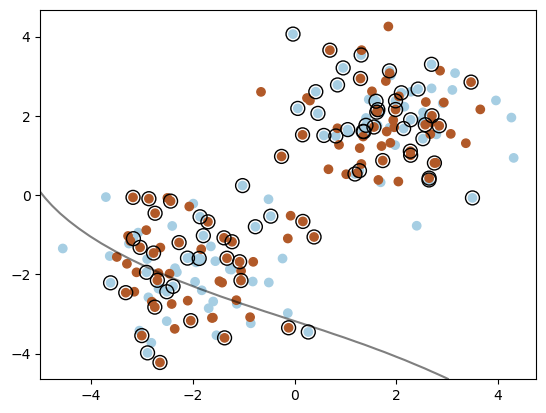

Poly
penalty:  0.5
train_accuracy :  0.6
[[24 16]
 [16 24]]
test_accuracy :  0.4583333333333333
[[24 36]
 [29 31]]


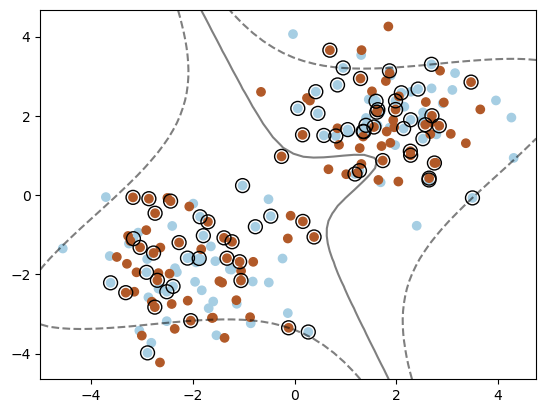

Poly
penalty:  5
train_accuracy :  0.6375
[[21 19]
 [10 30]]
test_accuracy :  0.5083333333333333
[[20 40]
 [19 41]]


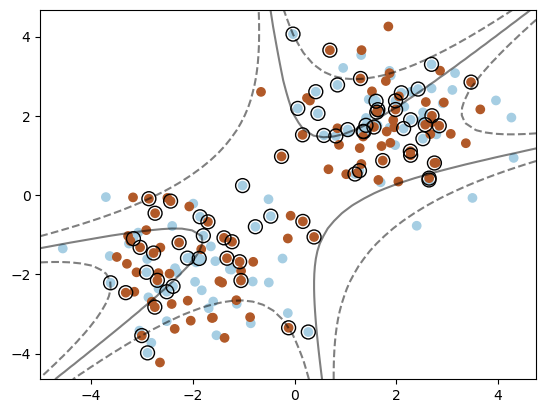

Poly
penalty:  10
train_accuracy :  0.675
[[26 14]
 [12 28]]
test_accuracy :  0.5083333333333333
[[23 37]
 [22 38]]


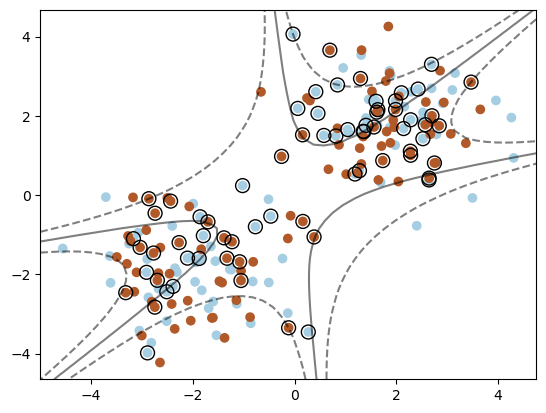

Poly
penalty:  10000
train_accuracy :  0.6375
[[30 10]
 [19 21]]
test_accuracy :  0.5
[[26 34]
 [26 34]]


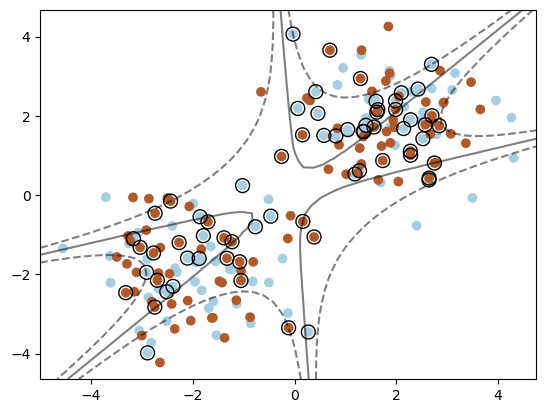

In [154]:


# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.005), ("reg", 0.5), ("reg", 5), ("reg", 10), ("reg", 10000)):
    
    print("Poly")
    print("penalty: ",penalty)
    
    train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.6, random_state=9)
    
    clf = svm.SVC(kernel="poly", C=penalty)
    clf.fit(train_X, train_Y)
    
    train_pred = clf.predict(train_X)
    train_cm = confusion_matrix(train_Y, train_pred)
    train_accuracy = accuracy_score(train_Y, train_pred)
    print("train_accuracy : ", train_accuracy)
    print(train_cm)
    
    test_pred = clf.predict(test_X)
    test_cm = confusion_matrix(test_Y, test_pred)  
    test_accuracy = accuracy_score(test_Y, test_pred)  
    print("test_accuracy : ", test_accuracy)
    print(test_cm)
    
    # Plot the decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    plt.show()

    

RBF
penalty:  1
train_accuracy :  0.6375
[[24 16]
 [13 27]]
test_accuracy :  0.425
[[19 41]
 [28 32]]


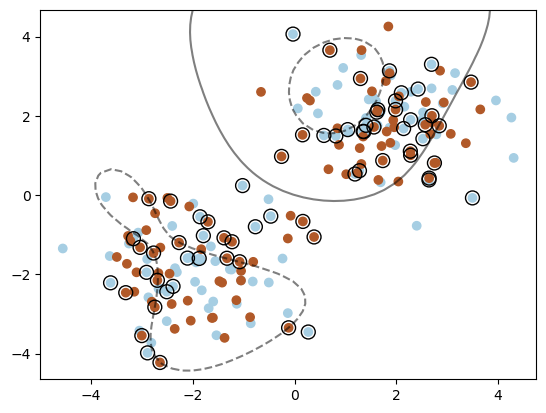

RBF
penalty:  0.005
train_accuracy :  0.6
[[25 15]
 [17 23]]
test_accuracy :  0.4083333333333333
[[22 38]
 [33 27]]


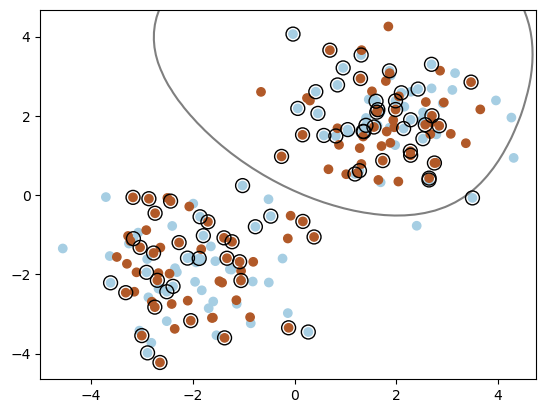

RBF
penalty:  0.5
train_accuracy :  0.6
[[25 15]
 [17 23]]
test_accuracy :  0.4083333333333333
[[20 40]
 [31 29]]


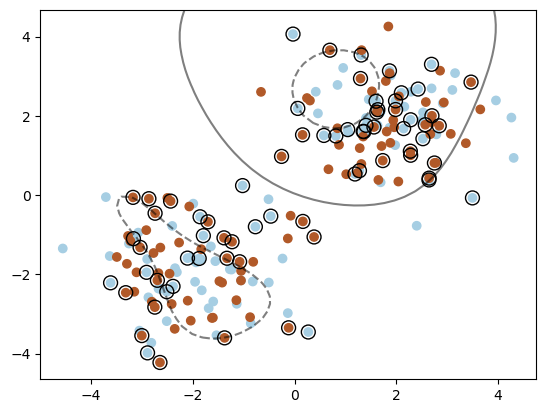

RBF
penalty:  5
train_accuracy :  0.6625
[[22 18]
 [ 9 31]]
test_accuracy :  0.4083333333333333
[[12 48]
 [23 37]]


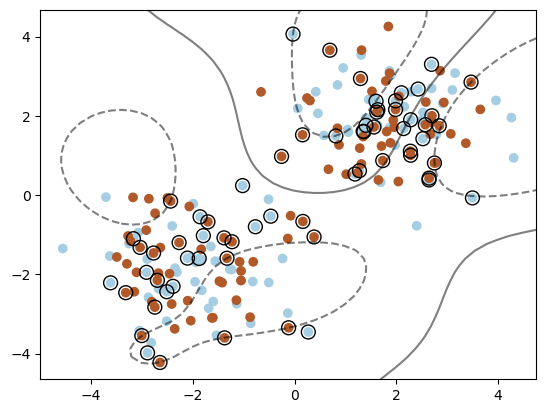

RBF
penalty:  10
train_accuracy :  0.65
[[21 19]
 [ 9 31]]
test_accuracy :  0.4083333333333333
[[12 48]
 [23 37]]


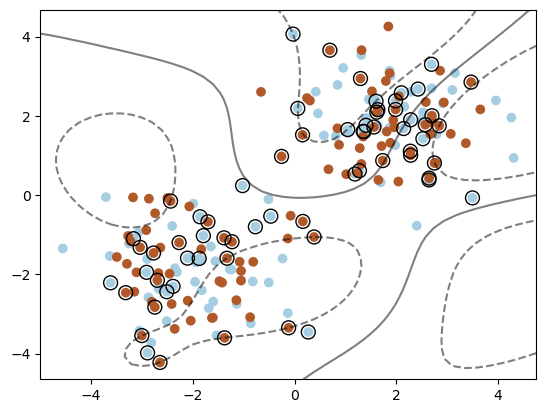

RBF
penalty:  10000
train_accuracy :  0.825
[[33  7]
 [ 7 33]]
test_accuracy :  0.5
[[31 29]
 [31 29]]


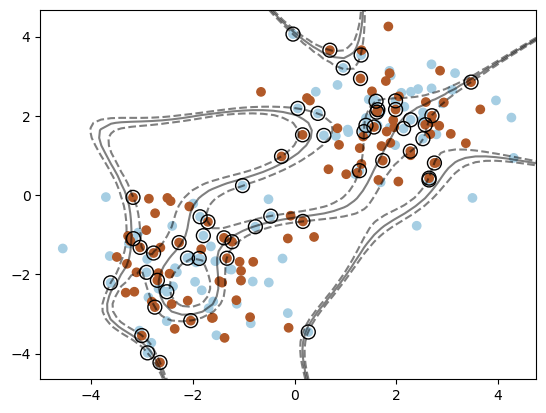

In [155]:


# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.005), ("reg", 0.5), ("reg", 5), ("reg", 10), ("reg", 10000)):
    
    print("RBF")
    print("penalty: ",penalty)
    
    train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.6, random_state=9)
    
    clf = svm.SVC(kernel="rbf", C=penalty)
    clf.fit(train_X, train_Y)
    
    train_pred = clf.predict(train_X)
    train_cm = confusion_matrix(train_Y, train_pred)
    train_accuracy = accuracy_score(train_Y, train_pred)
    print("train_accuracy : ", train_accuracy)
    print(train_cm)
    
    test_pred = clf.predict(test_X)
    test_cm = confusion_matrix(test_Y, test_pred)  
    test_accuracy = accuracy_score(test_Y, test_pred)  
    print("test_accuracy : ", test_accuracy)
    print(test_cm)
    
    # Plot the decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

    plt.show()

    